In [2]:
pip install pyodide-py

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn 

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import seaborn.objects as so

In [5]:
import random
categories = ['Food', 'Travel', 'Fashion', 'Fitness', 'Music', 'Culture', 'Family', 'Health']
data = {'Date': pd.date_range('2021-12-25', periods=730),
       'Category':[random.choice(categories) for _ in range(730)],
       'Likes': np.random.randint(0, 1000000000, size=730)}

In [6]:
df = pd.DataFrame(data)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      730 non-null    datetime64[ns]
 1   Category  730 non-null    object        
 2   Likes     730 non-null    int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 14.4+ KB


In [7]:
df['Category'].value_counts()

Category
Family     110
Fitness     97
Culture     96
Travel      95
Music       86
Food        84
Health      84
Fashion     78
Name: count, dtype: int64

In [19]:
import sqlite3
con = sqlite3.connect("FinalDB.db")
cur = con.cursor()
!pip install ipython-sql
%load_ext sql
%sql sqlite:///FinalDB.db

  Obtaining dependency information for ipython-sql from https://files.pythonhosted.org/packages/30/8f/9e50fa53ffc371483f9d1b90c1175b706d28a2e978e90a8894035af01905/ipython_sql-0.5.0-py3-none-any.whl.metadata
  Obtaining dependency information for prettytable from https://files.pythonhosted.org/packages/3d/c4/a32f4bf44faf95accbbd5d7864ddef9e289749a8efbc3adaad4a4671779a/prettytable-3.10.0-py3-none-any.whl.metadata
  Obtaining dependency information for sqlalchemy>=2.0 from https://files.pythonhosted.org/packages/4b/f8/c1fe26782e875a952f1bad265034185dbd888f6c55d4bb5f0f515e172b8d/SQLAlchemy-2.0.28-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for sqlparse from https://files.pythonhosted.org/packages/98/5a/66d7c9305baa9f11857f247d4ba761402cea75db6058ff850ed7128957b7/sqlparse-0.4.4-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ------- -------------------------------- 0.4/2.1 MB 12.9 MB/s eta 0:00:01
   ---------------

In [30]:
# Trying to be fancy here by playing with sql a bit; however the descending display of counts of each category is just above in previous line
df['Category'].value_counts()
df.to_sql('PostPerformance', con,if_exists='replace', index = False)
%sql select distinct(category), count(category) from PostPerformance group by category order by count(category)

 * sqlite:///FinalDB.db
Done.


Category,count(category)
Fashion,78
Food,84
Health,84
Music,86
Travel,95
Culture,96
Fitness,97
Family,110


In [8]:
df.dropna(inplace = True) #drop missing values
df['Likes'] = df['Likes'].astype(int)
df.drop_duplicates(inplace = True)#drop duplicates

In [9]:
df['Category'].value_counts() # since we don't have missing values and duplicates, the result is identical to the previous line

Category
Family     110
Fitness     97
Culture     96
Travel      95
Music       86
Food        84
Health      84
Fashion     78
Name: count, dtype: int64

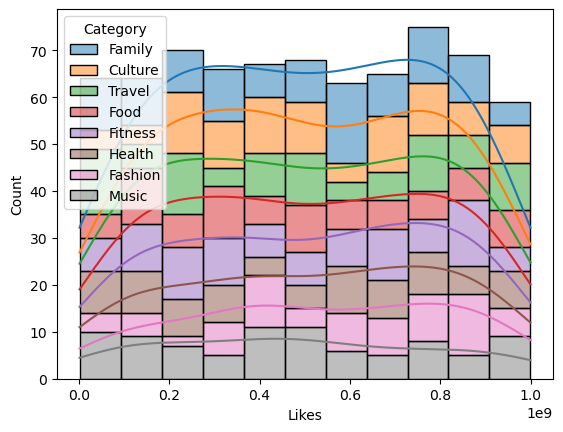

In [38]:
#visualize the data using the sns in a histogram plot of likes
sns.histplot(x="Likes", data=df, hue='Category',multiple='stack', kde = 1)

plt.show()

Interpretation of histogram:<br/><br/>
In histogram we aim to spot the pattern of skewness of the data: is the data demonstrating a bias towards positive or negative?<br/><br/>
In this case, take the middle value ( 0.5 x10^9) of the number of likes and see the left side and right side of the data,
we can say that the bars and lines are nearly symmetrical. This means the data is likely to have no specific skewness.
<br/><br/>
However, this is probably due to the data are generated completely by python, and the data generated is meant to be "random". In real world scenerio, we could expect there should be some kind of skewness - if the likes below 0.5x10^9 has a obiviously smaller bar area, we would get the conclusion that the performance are biased towards good performance.
<br/><br/>
Note that the distance between the lines are representation of the difference of each category. for example, 'family' has the largest difference with other categories in magnitude, therefore the distance of the line is also the greatest.

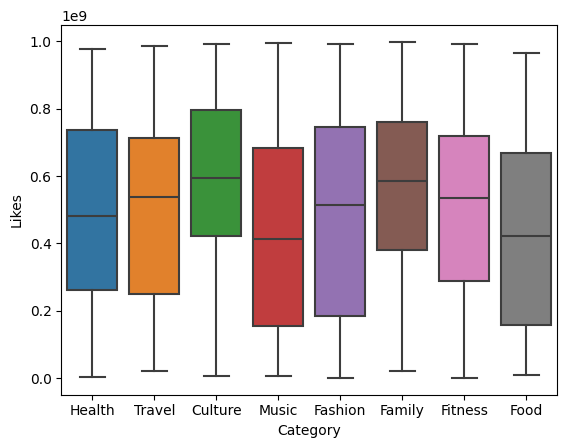

In [31]:
# create a boxplot with x=Category y=Likes
sns.boxplot(x='Category', y='Likes', data=df)
plt.show()

Interpretation of boxplots:
Here we can find the boxplots of each category and their range of number of likes.
Cheerfully the boxplots can tell us more about the data insights - let's dive in!
<br/>
1. Average: <br/> the median value shown by the line inside the boxes tell us about the average performance of each category: <br/> Culture, Family and Fitness are among the top 3 in terms of the median for the number of likes received; <br/> Music and Food, however, are not performing well as they are the least popular
<br/><br/>
2. Allocation of the likes of each post (skewness): <br/> within each category, we would like to see if any category has a lot of data that deviates from their median, as this may cause impact on the average when we use median. <br/> From the graph we can see most bars are symmetric, with the area above and below median line inside the box to be alike. <br/> However, if we look closer, we can see that Travel, Fashion, Fitness are having larger area below median, therefore their true performance may be worse. <br/>Health and Culture have more optimal performance, since the area above the median line is larger.
<br/><br/>
3. Dispersion:<br/> Despite the average performance, we would also like to know how volatile, or unstable, each category is performing. And this can be seen with the length of each colored area.<br/> Culture and Family have a stable performance, since their length is relatively smaller;<br/>Music and Food are, in comparison, not stable with a longer range.
<br/><br/>

In [33]:
df['Likes'].mean()

499519833.4260274

In [50]:
#print out the mean of each categories' likes
df_gptest = df[['Category','Likes']]
df_gptest=df_gptest.groupby(['Category'], as_index=0).mean()
df_gptest
%sql select category, avg(likes) from PostPerformance group by category order by avg(likes) desc

 * sqlite:///FinalDB.db
Done.


Category,avg(likes)
Fashion,579680783.7948718
Culture,522202392.25
Fitness,500643155.82474226
Health,493417824.4166667
Family,487086479.1545454
Travel,484938110.24210525
Food,480990736.10714287
Music,480781562.0


Interpretation of mean:<br/><br/>
Here we can see that the average value of each category is giving another picture from what we drew above.<br/><br/>
Overall, Fashion, Culture and Fitness are above the total average of all the post. <br/><br/>
Culture and Fitness have appeared to be superior in our previous analysis, so it was no surprise.<br/><br/>
However, to be frank, I have no idea why Fashion is the top 1 in this table. My only clue is that Fashion has the smallest total number of post among all the categories, and this probably results in a large mean (since the demoninator is the smallest).

Project Background:<br/><br/>
My role is to analyse the performance of a social media platform promotion ability by the number of likes for each post.
To simplify the situation, I assume from the period of 2021.12.25 to 2023.12.25 ( totalled 730 days), there will be one post for each category per day. I randomly generated the number of likes for each post, and try to interpret from the data how each category is performing in terms of how much likes they received.<br/><br/>


Conclusion & Recommendation:<br/><br/>
Overall I would advise marketers to prioritize the investment on the Culture topic, since it has a good average performance, and the performance has been consistently stable over the period.<br/><br/>
I would also recommend Family and Fitness, since these two are also having a good overall performance with little volatility.<br/><br/>


And here is the end of this case - - thanks for reading!! All discussions welcomed!! 